# Libraries

In [7]:
from data_grab import Data_Grab
import pygal

# Data Structures
Each of these hold their respective raw data. What I would like to do 
is categorize them and make three graphs. The Plot will represent the 
average mpg vs year for 4, 6, and 8 cylinders. My expectation is that 
the 4 cylinder will have the highest mpg on average while the 8 will 
have the lowest. 

In [8]:
rawData = Data_Grab()

mpgRaw = []
rawData.dataOfInterest(0)
mpgRaw = rawData.processedData

cylinderRaw = []
rawData.dataOfInterest(1)
cylinderRaw = rawData.processedData

yearRaw = []
rawData.dataOfInterest(6)
yearRaw = rawData.processedData

yearTrack = 0
rawTrack  = 0
currentYear = 0

# Sort
fourCylMessy  = []
sixCylMessy   = []
eightCylMessy = []

# Average
mpgAVG  = 0

# Store
fourCylClean  = []
sixCylClean   = []
eightCylClean = []

# Data Analysis

data analysis time. It's getting late but here's my idea. Write a 
while loop which will cycle through the 3 different cylinder options. 
It'll pick out a corresponding year, dump it into the messy grouping 
and average. Append the clean file with the average. If no values 
exist then have it enter "None". When I'm done I should have 13 data 
points per cylinder which will make for a solid graph.

So the first idea I feel is computationaly heavy so here's idea 2: 
Give up the cylinder while loop for 2 new arrays (min) and a few 
conditional statements designed to cycle through the cylinders 
automatically. The first loop will be a year tracker while the second 
will cycle through the data. There will be three if statements 
designed to sort the data into the appropriate "messy" cylinder bins. 
Once the second while loop is done, the "messy" data will be averaged
and stored into a "clean" data set. If there is no data for a given 
year (I'm expecting this to happen for cylinder 8) the string "None"
will be entered. Once the averaging is done, the messy arrays will be
cleaned out and we restart the process for the new year.

In [10]:
while yearTrack < 13:
    currentYear = 70 + yearTrack
    while rawTrack < 398:
# Sort
        if (cylinderRaw[rawTrack] == 4 
            and yearRaw[rawTrack] == currentYear):
            fourCylMessy.append(mpgRaw[rawTrack])

        if (cylinderRaw[rawTrack] == 6 
            and yearRaw[rawTrack] == currentYear):
            sixCylMessy.append(mpgRaw[rawTrack])

        if (cylinderRaw[rawTrack] == 8 
            and yearRaw[rawTrack] == currentYear):
            eightCylMessy.append(mpgRaw[rawTrack])
            
        rawTrack = rawTrack +1

# Average and store
    if len(fourCylMessy) > 0:
        mpgAVG = float(sum(fourCylMessy)/len(fourCylMessy))
        fourCylClean.append(mpgAVG)
        mpgAVG = 0
        fourCylMessy  = []
    elif len(fourCylMessy) == 0:
        fourCylClean.append(None)

    if len(sixCylMessy) > 0:
        mpgAVG = float(sum(sixCylMessy)/len(sixCylMessy))
        sixCylClean.append(mpgAVG)
        mpgAVG = 0
        sixCylMessy   = []
    elif len(sixCylMessy) == 0:
        sixCylClean.append(None)

    if len(eightCylMessy) > 0:
        mpgAVG = float(sum(eightCylMessy)/len(eightCylMessy))
        eightCylClean.append(mpgAVG)
        mpgAVG = 0
        eightCylMessy = []
    elif len(eightCylMessy) == 0:
        eightCylClean.append(None)
    
    rawTrack = 0    
    yearTrack = yearTrack +1

In [6]:
# http://pygal.org/en/stable/documentation/types/line.html
line_chart = pygal.Line()
line_chart.title = 'Average Miles per Gallon over Time'
line_chart.x_labels = map(str, range(70,82))
line_chart.add('Four Cylinder',fourCylClean)
line_chart.add('Six Cylinder',sixCylClean)
line_chart.add('Eight Cylinder',eightCylClean)
line_chart.render_to_file('mpg_VS_Time.svg')

<IPython.core.display.Javascript object>


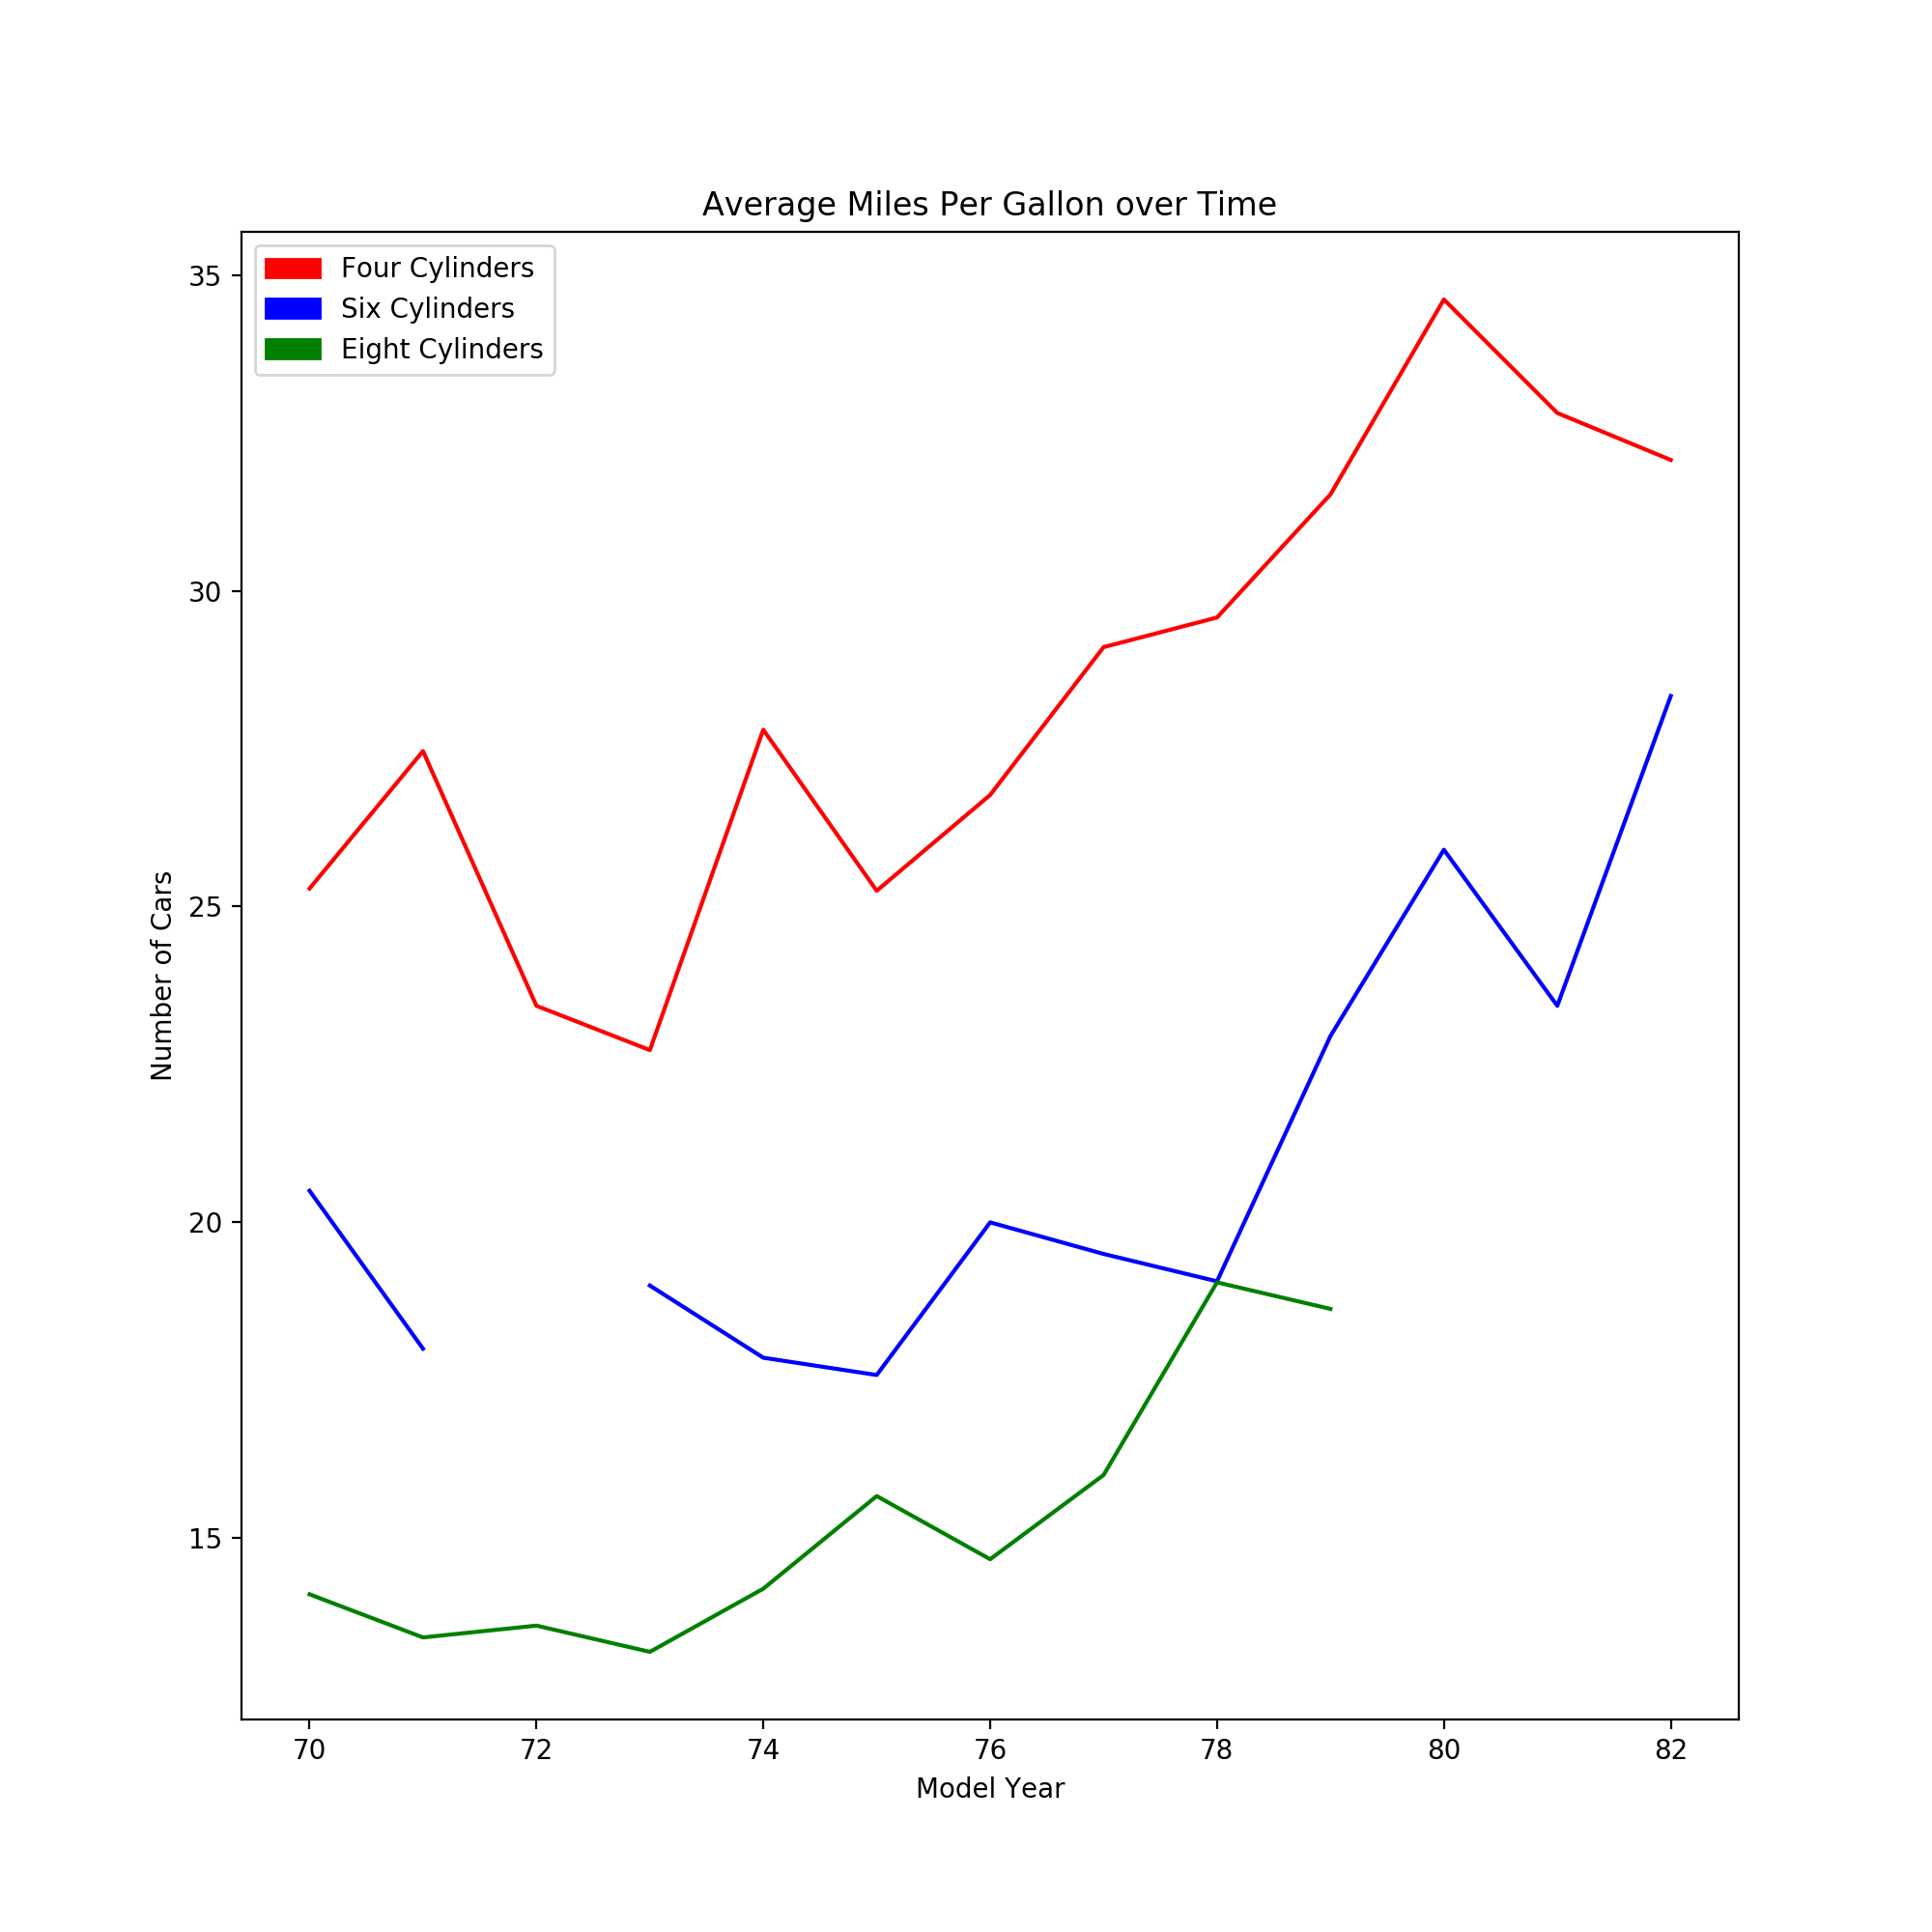

In [23]:
%matplotlib notebook 
# ^-- notebook magic, not python
# Matplotlib Example
import matplotlib.pyplot as plt
import matplotlib as mpl

# make a figure to put plots on
x = list(range(70,83))
figure, axis = plt.subplots(figsize=(10,10))
axis.set_title("Average Miles Per Gallon over Time")
axis.set_xlabel("Model Year")
axis.set_ylabel("Number of Cars")
axis.plot(x, fourCylClean, 'r')
axis.plot(x, sixCylClean, 'b')
axis.plot(x, eightCylClean, 'g')

plt.legend(
    handles=[
        mpl.patches.Patch(color='red', label='Four Cylinders'),
        mpl.patches.Patch(color='blue', label='Six Cylinders'),
        mpl.patches.Patch(color='green', label='Eight Cylinders'),
    ]
)